In [23]:
# Authors: Adithya Pediredla and Monika Roznere
import numpy as np
from skimage import util
from skimage import color
from skimage import io
from skimage import data
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline
# import cv2

In [28]:
# Read the image
# For most cases!!! -- normalize pixel intensities to [0,1]
image = np.double(data.astronaut())/255
height, width, c = image.shape

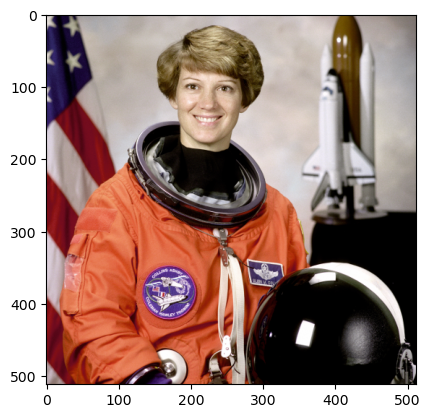

In [25]:
# Original image
plt.imshow(image, vmin=0, vmax=1)
plt.show()

In [26]:
%%time

# Example: Multiplying each pixel intensity by 2

# non-vectorized code
image2_nv = np.zeros(image.shape)

for i in range(0, height):
    for j in range(0, width):
        # For every pixel location, multiply the RGB intensities by 2
        image2_nv[i, j,:] = 2*image[i, j,:]

CPU times: user 532 ms, sys: 3.93 ms, total: 535 ms
Wall time: 534 ms


In [5]:
%%time
# vectorized code
image2_v = 2*image

CPU times: user 2.57 ms, sys: 2.72 ms, total: 5.29 ms
Wall time: 3.48 ms


In [6]:
# No error in values b/t the two versions
np.sum( (image2_nv - image2_v)**2)

0.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


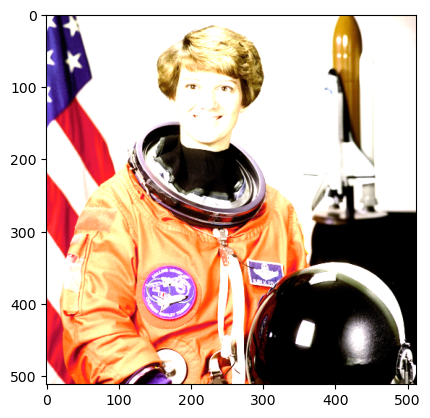

In [7]:
# visualize naive doubling of image

plt.imshow(image2_nv)
plt.show()

In [37]:
# This is how to initialize an array from 0 (included) to 10 (not included) by steps of 2
np.arange(0, 10, 2)

array([0, 2, 4, 6, 8])

In [36]:
np.arange(0, height, 8)

array([  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96,
       104, 112, 120, 128, 136, 144, 152, 160, 168, 176, 184, 192, 200,
       208, 216, 224, 232, 240, 248, 256, 264, 272, 280, 288, 296, 304,
       312, 320, 328, 336, 344, 352, 360, 368, 376, 384, 392, 400, 408,
       416, 424, 432, 440, 448, 456, 464, 472, 480, 488, 496, 504])

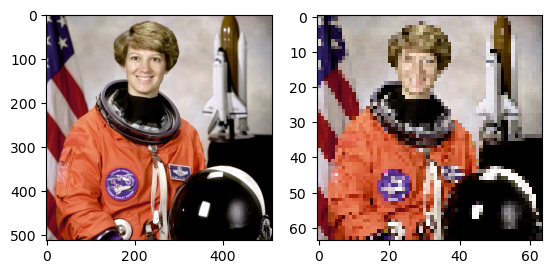

In [43]:
#down sample image by 8

# poor
image_ds8 = image[np.arange(0, height, 8),:,:]
image_ds8 = image_ds8[:,np.arange(0, width, 8),:]

# better
image_ds8 = image[::8,::8,:]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(image_ds8)


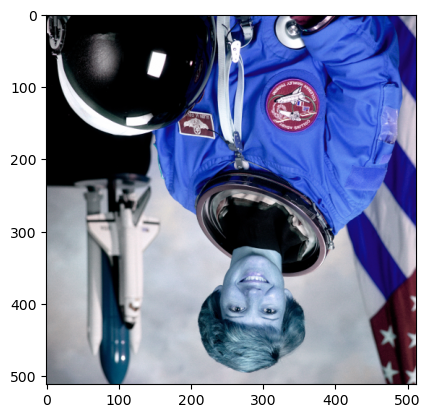

In [10]:
# flip the image on both x,y,c axis --- same as rotating it by 180 degrees and changing color channels
image_inv = image[::-1, ::-1, ::-1]
plt.imshow(image_inv)

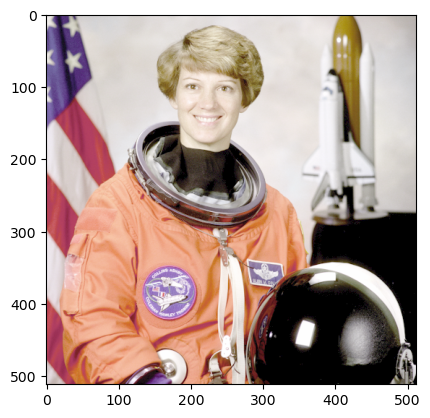

In [11]:
# power (gamma again)
image_gamma = image**(1/2.2)
plt.imshow(image_gamma)

In [12]:
# log (why not ! How to avoid the warning/errors)
image_log = -np.log(image)

/var/folders/38/hf5q3hsn31d3s9txmy5gyrfr0000gn/T/ipykernel_39048/613397425.py:2: RuntimeWarning: divide by zero encountered in log
  image_log = -np.log(image)


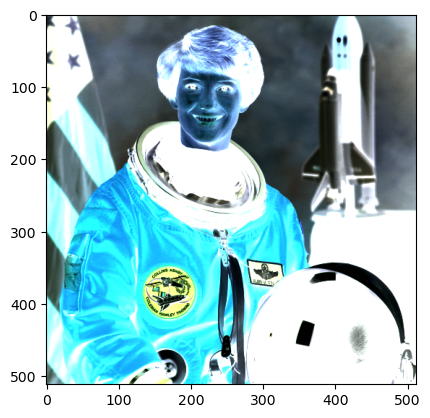

In [13]:
# Get indices where image==0
image_duplicate = image.copy()
locs = np.where(image_duplicate < 0.99/255)

# Replace the values with epsilon (eps)
image_duplicate[locs] = np.finfo(float).eps

# Now can log
image_log = -np.log(image_duplicate)

# Clip -- sets bounds; anything <0 is =0 and anything >1 is =1
image_log = np.clip(image_log, 0, 1)

plt.imshow(image_log)

In [14]:
# Multiple commands in single lin

image_duplicate = image.copy()

image_duplicate[np.where(image_duplicate==0)] = np.finfo(float).eps


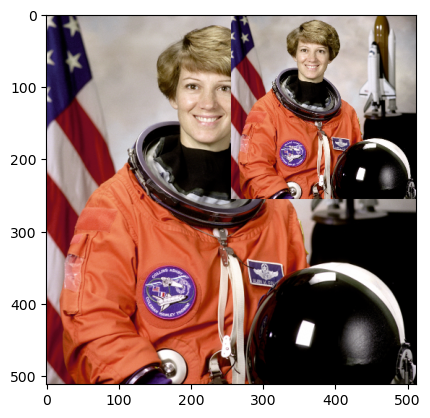

In [44]:
# Make top (bottom) right corner of image be half sized image
image_in_image = image.copy()

# Top right placement
image_in_image[0:int(height/2):1, int(width/2)::1, :] = image_in_image[::2, ::2, :]

# Bottom right placement
image_in_image[int(height/2)::1, int(width/2)::1, :] = image_in_image[::2, ::2, :]

plt.imshow(image_in_image)

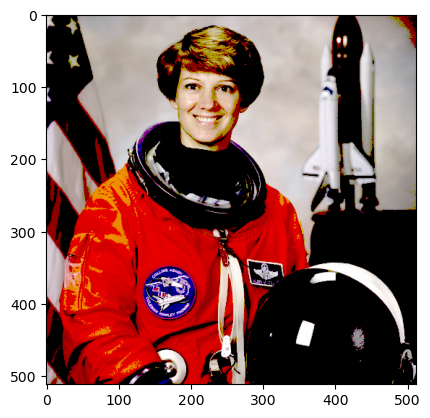

In [27]:
# Hard Threshold
thresh = 0.5
image_ht = image.copy()

# At pixel locations w/ RGB intensities <0.5 set the values to 0
# So any channel w/ < 0.5 that channel intensity = 0
image_ht[np.where(image_ht < thresh)] = 0.0

plt.imshow(image_ht)

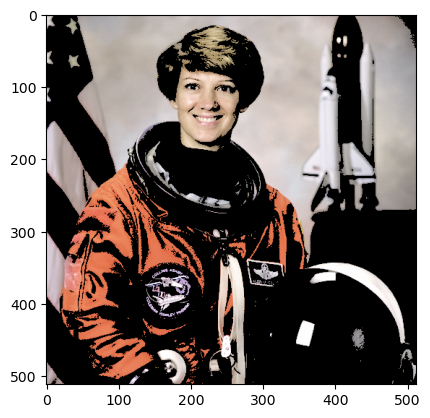

In [17]:
# Hard Threshold on gray value
thresh = 0.5

# Convert to grayscale
image_gray = color.rgb2gray(image)
image_ht = image.copy()

# Any location in gray image below threshold, set color image value to 0
image_ht[np.where(image_gray < thresh)] = 0.0

plt.imshow(image_ht)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


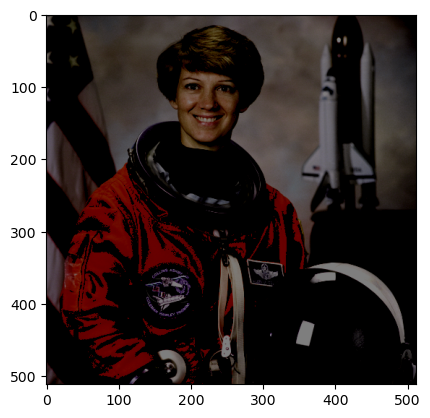

In [18]:
# Soft Threshold on gray value
thresh = 0.5
image_gray = color.rgb2gray(image)
image_st = image.copy()

image_st[np.where(image_gray < thresh)] = 0

# anywhere above threshold, subtract thresh from current intensity (RGB - 0.5)
image_st[np.where(image_gray >= thresh)] = image_st[np.where(image_gray >= thresh)] - thresh
plt.imshow(image_st)

In [19]:
# Matrix multiplication

A = np.random.rand(3, 4)
x = np.random.rand(4, 1)

b = A@x

print("A:", A)
print("x:", x)
print("b:", b)

A: [[0.93718932 0.23787844 0.02116895 0.09313778]
 [0.53586135 0.76070412 0.71562446 0.31609294]
 [0.57192724 0.69162675 0.00304286 0.59381087]]
x: [[0.90848232]
 [0.00950496]
 [0.81121945]
 [0.08487624]]
b: [[0.87875881]
 [1.1014083 ]
 [0.57902854]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


A: [[0.76046237 0.08328617 0.03188209]
 [0.6352091  0.18386741 0.07951566]
 [0.59254    0.43267989 0.32023509]]

original image size: (512, 512, 3)

after 1st transpose size: (3, 512, 512)
after 1st reshape size: (3, 262144)

after filter size: (3, 262144)

after 2nd reshpae size: (3, 512, 512)
after 2nd tranpose size: (512, 512, 3)


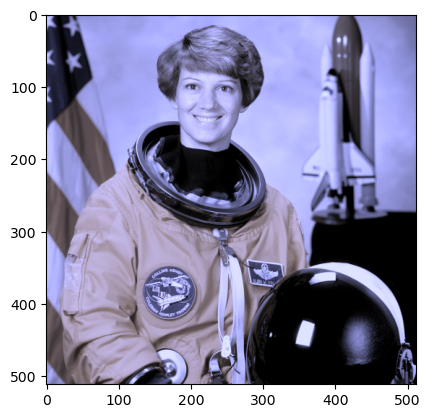

In [55]:
# Multiply each pixel (all three colors) with a 3x3 matrix and display the new image

A = np.random.rand(3,3)
print("A:", A)
# A = np.eye(3)
# A[0, 0] = .75
# A[1, 1] = 1
# A[2, 2] = 1

image_dup = image.copy()
print("\noriginal image size:", image_dup.shape)

# Transpose (pixel location, color) --> (color, pixel location)
image_dup = np.transpose(image_dup, [2,0,1])
print("\nafter 1st transpose size:", image_dup.shape)

# Reshape (flattening in this case)
image_dup = np.reshape(image_dup, (3, width*height))
print("after 1st reshape size:", image_dup.shape)

# Apply random filter
image_col_tf = A@image_dup
print("\nafter filter size:", image_col_tf.shape)

# Reshape (2D to 3D)
image_col_tf = np.reshape(image_col_tf, (3, height, width))
print("\nafter 2nd reshpae size:", image_col_tf.shape)

# Transpose back to priginal format
image_col_tf = np.transpose(image_col_tf, [1, 2, 0])
print("after 2nd tranpose size:", image_col_tf.shape)
 
plt.imshow(image_col_tf)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


after 1st transpose size: (3, 512, 512)
after 1st reshape size: (3, 262144)

after 'solve' size: (3, 262144)

after 2nd reshpae size: (3, 512, 512)

after 2nd transpose size: (512, 512, 3)


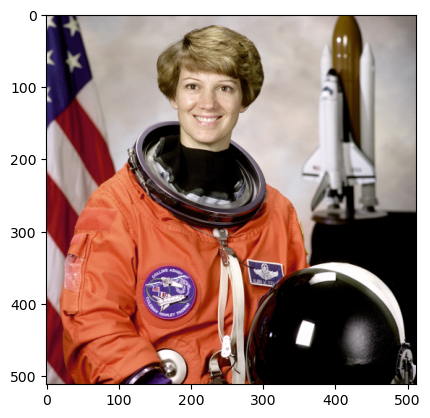

In [56]:
#How about inverse. 

# Tranpose
image_col_tf = np.transpose(image_col_tf, [2,0,1])
print("after 1st transpose size:", image_col_tf.shape)

image_col_tf = np.reshape(image_col_tf, (3, width*height))
print("after 1st reshape size:", image_dup.shape)

# Returns x based on the solution to the system A x = b
image_col_itf = np.linalg.solve(A, image_col_tf)
print("\nafter 'solve' size:", image_col_itf.shape)

image_col_itf = np.reshape(image_col_itf, (3, height, width))
print("\nafter 2nd reshpae size:", image_col_itf.shape)
image_col_itf = np.transpose(image_col_itf, [1, 2, 0])
print("\nafter 2nd transpose size:", image_col_itf.shape)
plt.imshow(image_col_itf)




In [22]:
# Error between processed+inverted back image and original image
np.sum((image_col_itf - image)**2)

2.772869969414532e-25